In [155]:
import pandas as pd

In [156]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [157]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921


In [158]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [159]:
confirmed['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [160]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
6/11/21                 87716
6/12/21                 88740
6/13/21                 89861
6/14/21                 91458
6/15/21                 93272
Name: 0, Length: 515, dtype: object

In [161]:
# armazenando a data mais atual (última)
last_date = '6/14/21'

In [162]:
confirmed['Country/Region'].value_counts()

China             34
Canada            16
France            12
United Kingdom    12
Australia          8
                  ..
Albania            1
Vietnam            1
South Africa       1
Niger              1
Sierra Leone       1
Name: Country/Region, Length: 193, dtype: int64

In [163]:
# valor falso pois o erro é muito grande
# descartaremos esta análise pois tem muito campo vazio (muita disparidade no padrão)
confirmed['Country/Region'].value_counts()

China             34
Canada            16
France            12
United Kingdom    12
Australia          8
                  ..
Albania            1
Vietnam            1
South Africa       1
Niger              1
Sierra Leone       1
Name: Country/Region, Length: 193, dtype: int64

In [164]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921


In [165]:
confirmed_by_country.loc["China"][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
6/11/21    103320.0
6/12/21    103357.0
6/13/21    103380.0
6/14/21    103401.0
6/15/21    103424.0
Name: China, Length: 511, dtype: float64

In [166]:
import matplotlib.pyplot as plt

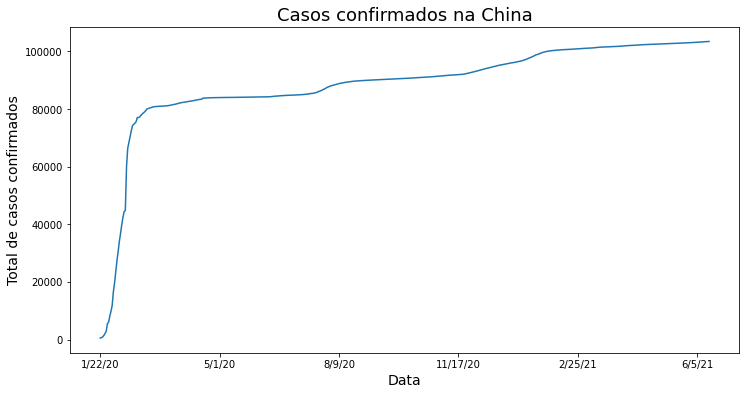

In [167]:
# casos confirmados cumulativos na China
# compara o momento inicial ao momento atual

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

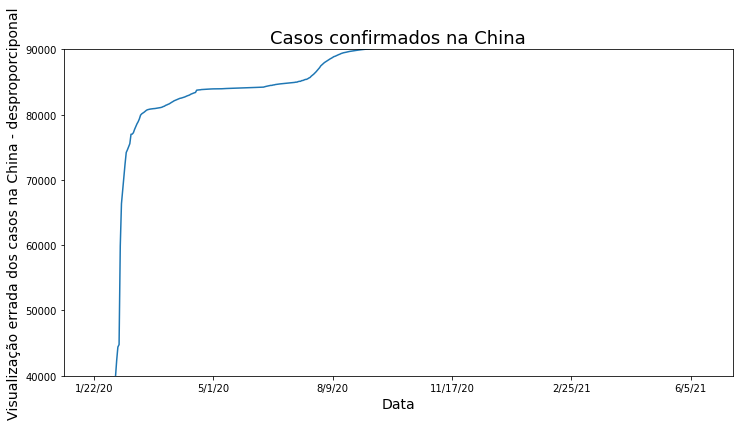

In [168]:
# limitando o eixo y
# mensagem ruim a quem está visualizando o gráfico

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Visualização errada dos casos na China - desproporciponal', fontsize = 14)
plt.ylim(40000, 90000)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

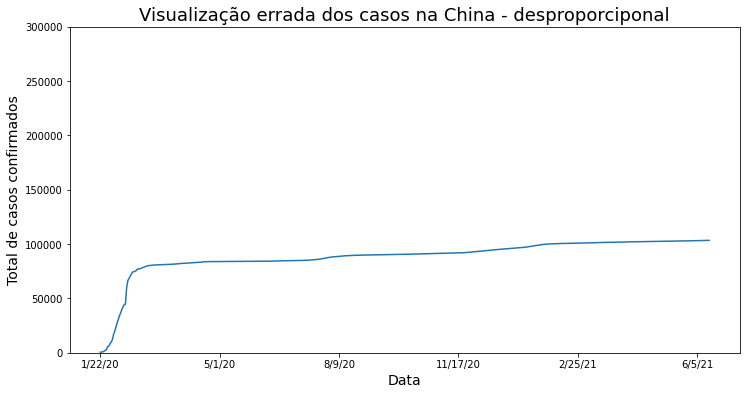

In [169]:
# mensagem ruim a quem está visualizando o gráfico
# compara o momento inicial com 300 mil

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.ylim(0, 300000)
plt.title('Visualização errada dos casos na China - desproporciponal', fontsize = 18)
plt.show()

In [170]:
# casos confirmados por dia na China
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()

In [171]:
new_cases_china.describe()

count      510.000000
mean       201.717647
std        889.992834
min         -1.000000
25%         19.000000
50%         31.000000
75%         88.000000
max      15136.000000
Name: China, dtype: float64

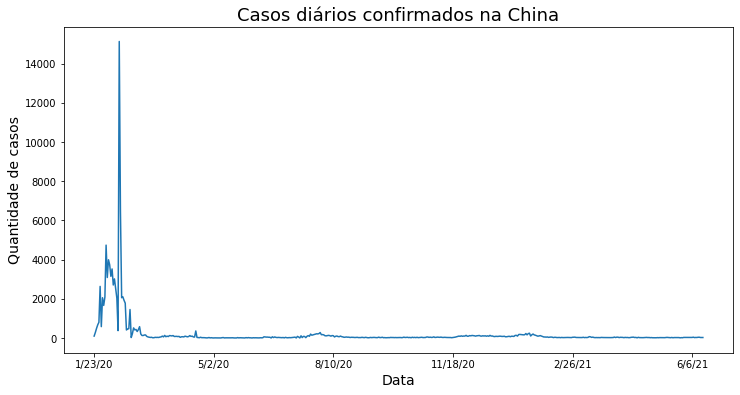

In [172]:
# gráfico dos casos diários na China
plt.figure(figsize = (12, 6))
new_cases_china.plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos diários confirmados na China', fontsize = 18)
plt.show()

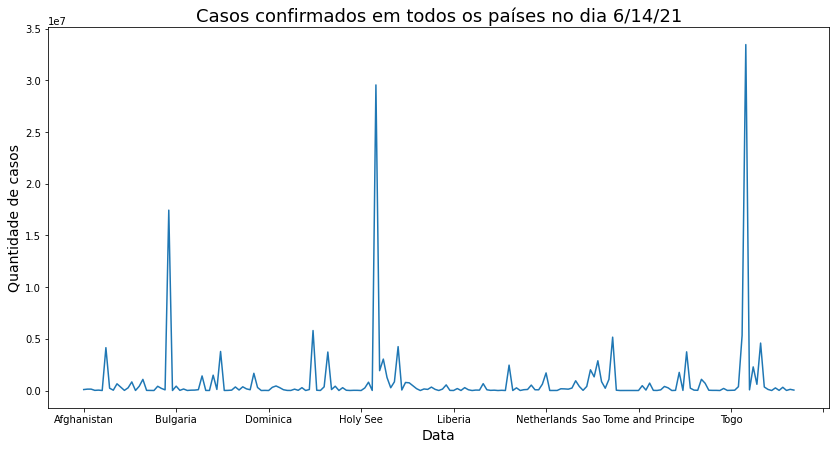

In [173]:
# últimos casos confirmados em cada país
plt.figure(figsize = (14, 7))
confirmed_by_country[last_date].plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

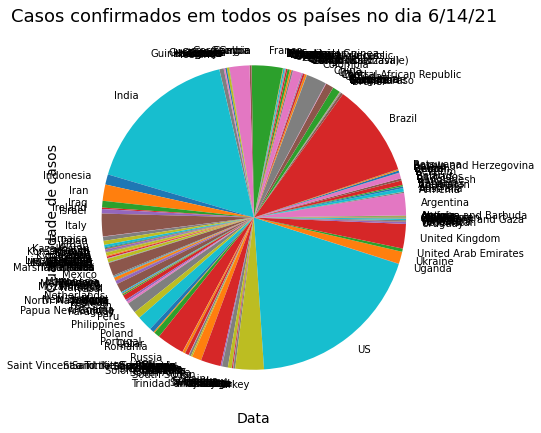

In [174]:
# QUASE SEMPRE DEVEMOS EVITAR GRÁFICO DE PIZZA
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'pie')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

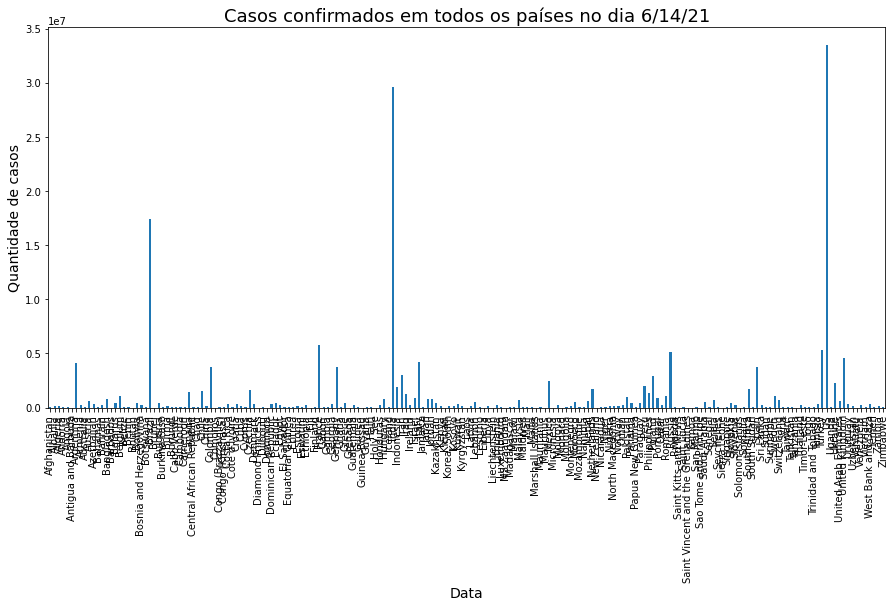

In [175]:
#gráfico de barra
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

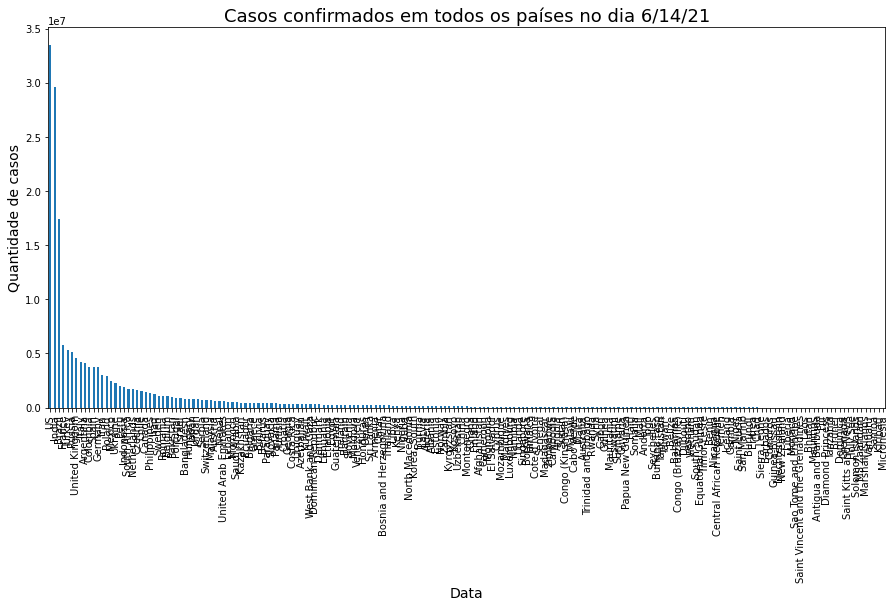

In [176]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False).plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

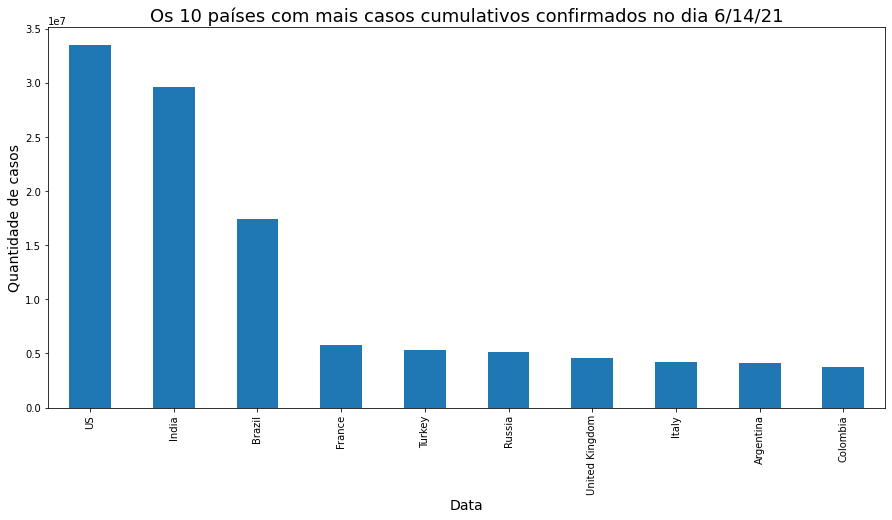

In [177]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False)[0:10].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Os 10 países com mais casos cumulativos confirmados no dia {}'.format(last_date), fontsize = 18)
plt.show()

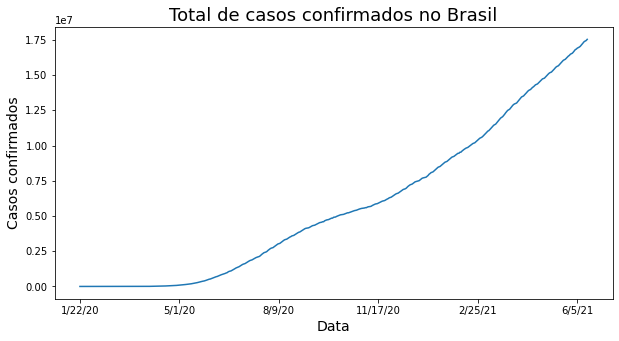

In [178]:
# casos confirmados cumulativos na Brasil
plt.figure(figsize = (10, 5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Casos confirmados', fontsize = 14)
plt.title('Total de casos confirmados no Brasil', fontsize = 18)
plt.show()

In [179]:
# mortos e recuperados no mundo
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [180]:
# casos de morte e recuperados no mundo
deaths_by_country = deaths.groupby('Country/Region').sum()
recovered_by_country = recovered.groupby('Country/Region').sum()

In [181]:
display(recovered.head())
display(deaths.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,54019,54040,54222,54382,54503,54534,54619,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741,57963,58070,58144,58265,58622,58998,59569,59871,60280,60598,60939,61410,61706,61820
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,115253,116126,117089,118041,119061,120072,121122,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473,129521,129566,129598,129627,129664,129702,129736,129761,129785,129807,129826,129842,129865,129879
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86149,86280,86420,86554,86703,86857,87003,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057,90281,90517,90767,90995,91198,91413,91651,91894,92132,92384,92620,92852,93094,93355
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12936,12962,12995,13021,13070,13104,13104,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479,13507,13527,13527,13527,13527,13557,13557,13569,13578,13591,13591,13591,13618,13626
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24698,24713,24717,24772,25145,25187,25629,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190,28264,28646,28802,28866,28880,29329,29368,29553,29960,30101,30207,30282,30359,30775


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899,2919,2944,2973,3007,3034,3068,3104,3145,3187,3251,3305,3356,3412,3449,3527,3612,3683
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449,2450,2451,2451,2451,2451,2451,2451,2451,2452,2452,2452,2452,2453,2453,2453,2453,2454
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460,3465,3472,3480,3490,3497,3504,3510,3518,3527,3537,3544,3552,3560,3565,3571,3579,3588
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,628,630,633,636,639,645,649,651,655,659,677,685,696,704,709,715,725,731,735,742,745,749,757,764,766,772,780,784,788,794,797,800,803,811,815,819,825,831,836,842


In [182]:
# função que retorna a última data agrupada por país
def latest_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

display(latest_by_country(confirmed))
display(latest_by_country(deaths))
display(latest_by_country(recovered))

Country/Region
Afghanistan            93272
Albania               132469
Algeria               134115
Andorra                13828
Angola                 36921
                       ...  
Vietnam                11304
West Bank and Gaza    311948
Yemen                   6864
Zambia                115824
Zimbabwe               40318
Name: 6/15/21, Length: 193, dtype: int64

Country/Region
Afghanistan           3683
Albania               2454
Algeria               3588
Andorra                127
Angola                 842
                      ... 
Vietnam                 61
West Bank and Gaza    3542
Yemen                 1350
Zambia                1444
Zimbabwe              1637
Name: 6/15/21, Length: 193, dtype: int64

Country/Region
Afghanistan            61820
Albania               129879
Algeria                93355
Andorra                13626
Angola                 30775
                       ...  
Vietnam                 4539
West Bank and Gaza    304390
Yemen                   3775
Zambia                 99895
Zimbabwe               37056
Name: 6/15/21, Length: 193, dtype: int64

In [183]:
# chamando a função e colocando num DataFrame
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis = 1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,93272,3683,61820
Albania,132469,2454,129879
Algeria,134115,3588,93355
Andorra,13828,127,13626
Angola,36921,842,30775
...,...,...,...
Vietnam,11304,61,4539
West Bank and Gaza,311948,3542,304390
Yemen,6864,1350,3775


## Taxa de letalidade:

In [184]:
# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_1 * 100))
print('A segunda estimativa (pessimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_2 * 100))

A primeira estimativa (otimista) da taxa de letalidade é: 2.164%
A segunda estimativa (pessimista) da taxa de letalidade é: 3.223%


In [185]:
# função que retorna uma data específica agrupada por país
def latest_by_country_at(data, date):
  return data.groupby('Country/Region').sum()[date]

# chamando a função e colocando num DataFrame
informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis = 1)
combined_2_20_20.columns = ['confirmed', 'deaths', 'recovered']


# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined_2_20_20.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_1 * 100))
print('A segunda estimativa (pessimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_2 * 100))


A primeira estimativa (otimista) da taxa de letalidade é: 2.950%
A segunda estimativa (pessimista) da taxa de letalidade é: 11.005%


In [186]:
# usando uma data anterior de confirmados como referência
def latest_by_country_at(data, date):
  return data.groupby('Country/Region').sum()[date]

# chamando a função e colocando num DataFrame: DATA ANTERIOR
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis = 1)
combined_12.columns = ['confirmed', 'deaths', 'recovered']


# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined_12.loc['China']
letality_rate_3 = sum_up['deaths'] / sum_up['confirmed']
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_3 * 100))
display(sum_up)

A primeira estimativa (otimista) da taxa de letalidade é: 6.079%


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [187]:
# letalidade por país
letality_rate_1 = 100 * combined['deaths'] / combined['confirmed']
letality_rate_2 = 100 * combined['deaths'] / (combined['deaths'] + combined['recovered'])
combined['letality_rate_1'] = letality_rate_1
combined['letality_rate_2'] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,93272,3683,61820,3.948666,5.622643
Albania,132469,2454,129879,1.852509,1.854413
Algeria,134115,3588,93355,2.675316,3.701144
Andorra,13828,127,13626,0.918426,0.923435
Angola,36921,842,30775,2.280545,2.663124


In [188]:
# ordenando por taxa de  letalidade
combined.sort_values('letality_rate_1', ascending = False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,6864,1350,3775,19.667832,26.341463
Peru,2007477,189261,1968723,9.427804,8.770269
Mexico,2459601,230428,1960033,9.368511,10.519612
Sudan,36304,2732,29994,7.525342,8.348102
Syria,24904,1821,21690,7.312078,7.745311
Egypt,274404,15691,202650,5.718211,7.186465
Somalia,14823,775,7099,5.228361,9.842520


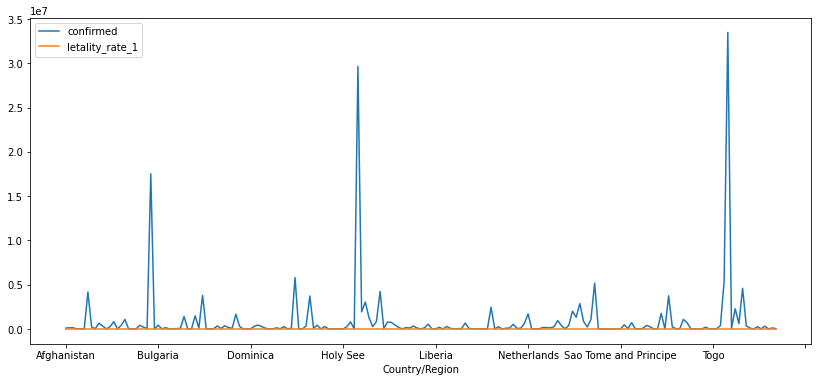

In [189]:
# péssima forma de visualizar, casos confirmados >>> taxa de letalidade (quase 0)
combined[['confirmed', 'letality_rate_1']].plot(figsize = (14, 6))

In [190]:
import seaborn as sns

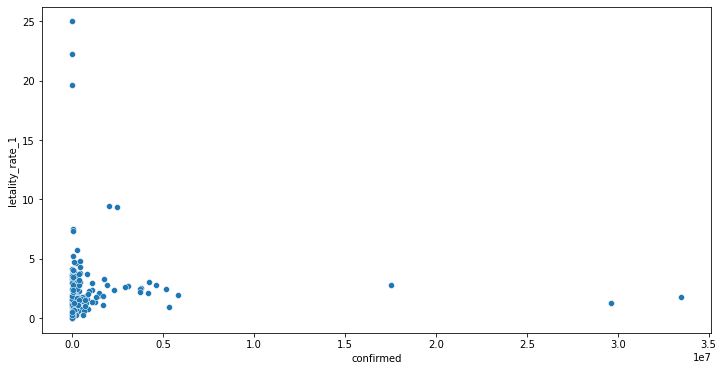

In [191]:
# scatterplot
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined, x = 'confirmed', y = 'letality_rate_1')

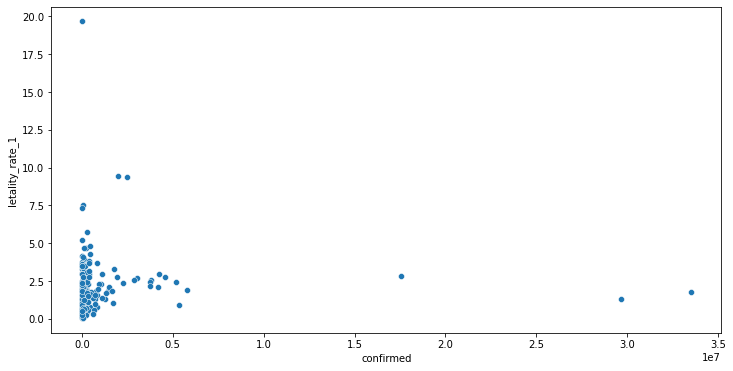

In [192]:
# apenas os países com mais de 40 casos confirmados
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined.query('confirmed > 500'), x = 'confirmed', y = 'letality_rate_1')

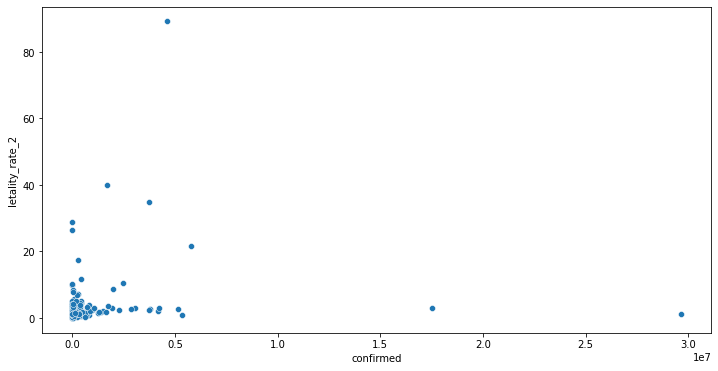

In [193]:
# letality_rate_2
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined.query('recovered > 40'), x = 'confirmed', y = 'letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


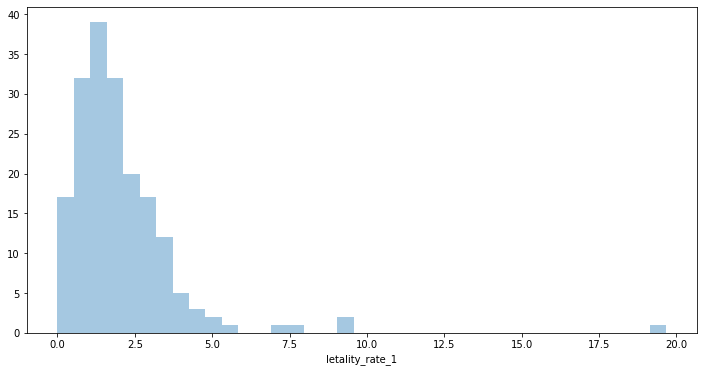

In [194]:
# distribuição
plt.figure(figsize = (12, 6))
sns.distplot(combined.query('confirmed > 40')['letality_rate_1'], kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


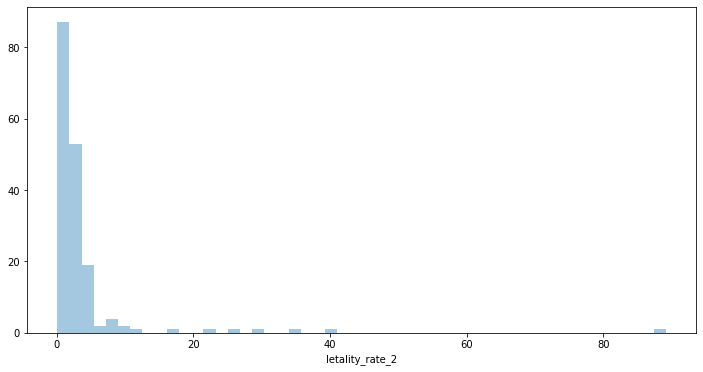

In [195]:
# distribuição
plt.figure(figsize = (12, 6))
sns.distplot(combined.query('recovered > 500')['letality_rate_2'], kde = False)

In [196]:
combined.sort_values('letality_rate_1', ascending = False).query('confirmed > 40').head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,6864,1350,3775,19.667832,26.341463
Peru,2007477,189261,1968723,9.427804,8.770269
Mexico,2459601,230428,1960033,9.368511,10.519612
Sudan,36304,2732,29994,7.525342,8.348102
Syria,24904,1821,21690,7.312078,7.745311
Egypt,274404,15691,202650,5.718211,7.186465
Somalia,14823,775,7099,5.228361,9.842520
Ecuador,439374,21061,398645,4.793411,5.018036
China,103424,4846,98020,4.685566,4.710983


# Segunda Parte

In [197]:
# selecionando apenas a China
confirmed.set_index('Country/Region').loc['China'].sum().tail()

6/11/21    103320
6/12/21    103357
6/13/21    103380
6/14/21    103401
6/15/21    103424
dtype: object

In [198]:
# selecionando se é China
is_china = confirmed['Country/Region'] == 'China'
is_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [199]:
# adicionando coluna 'is_china' ao DF
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,False


In [200]:
# query para selecionar apenas a China
confirmed.query('is_china').head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,is_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,994,994,994,994,994,996,999,999,1001,1001,1001,1001,1001,1001,1002,1002,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1058,1058,1058,1058,1059,1059,1059,1059,1059,1059,1059,1060,1061,1063,1064,1064,1065,1067,1067,1068,1069,1069,1070,1071,1071,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,597,597,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,595,595,597,597,597,598,598,598,598,599,599,599,610,610,612,613,615,616,617,617,618,620,621,621,624,625,625,628,629,629,631,632,632,635,636,637,637,638,638,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,True


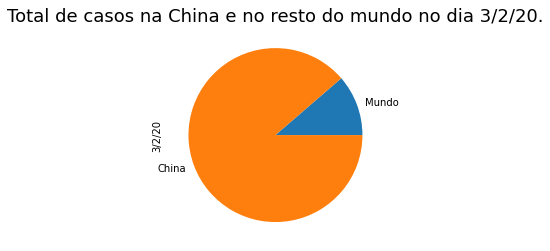

In [201]:
# plot no dia que foi gravao o curso
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind = 'pie', labels = ['Mundo', 'China'])
plt.title('Total de casos na China e no resto do mundo no dia 3/2/20.', fontsize = 18)
plt.show()

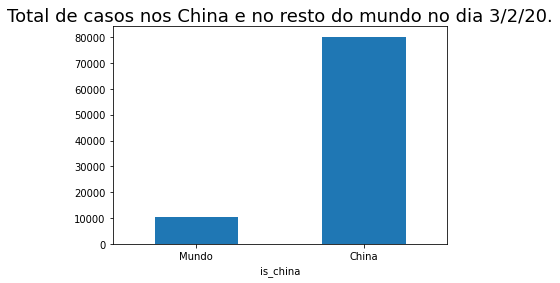

In [202]:
# plotando apenas para Chinia ou não
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind = 'bar')
plt.title('Total de casos nos China e no resto do mundo no dia {}.'.format('3/2/20'), fontsize = 18)
plt.xticks([False, True], ['Mundo', 'China'], rotation = 0)
plt.show()

Text(0.5, 1.0, 'Total de casos nos China e no resto do mundo no dia 6/14/21.')

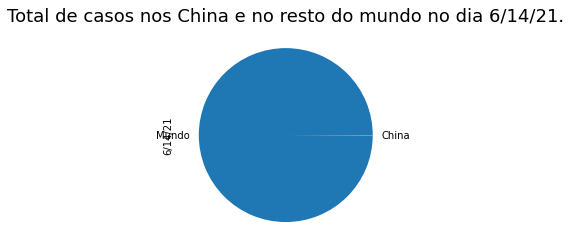

In [203]:
# plot no dia que foi gravao o curso
confirmed.groupby('is_china').sum()[last_date].plot(kind = 'pie', labels = ['Mundo', 'China'])
plt.title('Total de casos nos China e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)

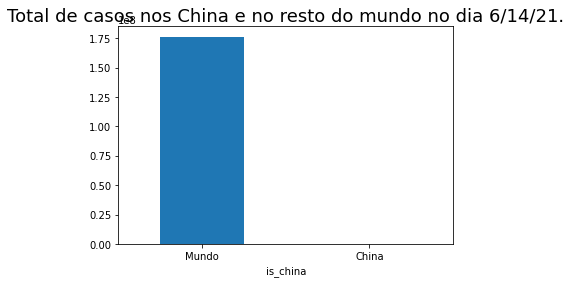

In [204]:
# plotando apenas para Chinia ou não
confirmed.groupby('is_china').sum()[last_date].plot(kind = 'bar')
plt.title('Total de casos nos China e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)
plt.xticks([False, True], ['Mundo', 'China'], rotation = 0)
plt.show()

In [205]:
# selecionando se é US
is_us = confirmed['Country/Region'] == 'US'
confirmed['is_us'] = is_us
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,is_china,is_us
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,False,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,False,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,False,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,False,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,False,False


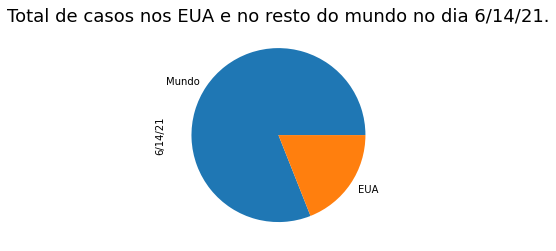

In [206]:
# plotando apenas para US ou não
confirmed.groupby('is_us').sum()[last_date].plot(kind = 'pie', labels = ['Mundo', 'EUA'])
plt.title('Total de casos nos EUA e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)

plt.show()


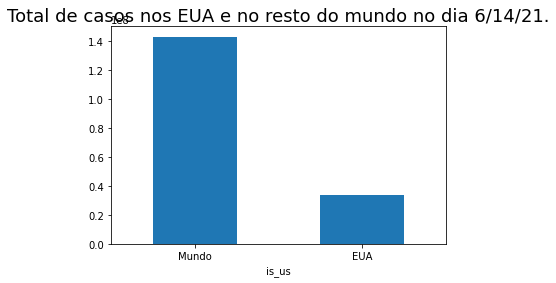

In [207]:
# plotando apenas para US ou não
confirmed.groupby('is_us').sum()[last_date].plot(kind = 'bar')
plt.title('Total de casos nos EUA e no resto do mundo no dia {}.'.format(last_date), fontsize = 18)
plt.xticks([False, True], ['Mundo', 'EUA'], rotation = 0)
plt.show()


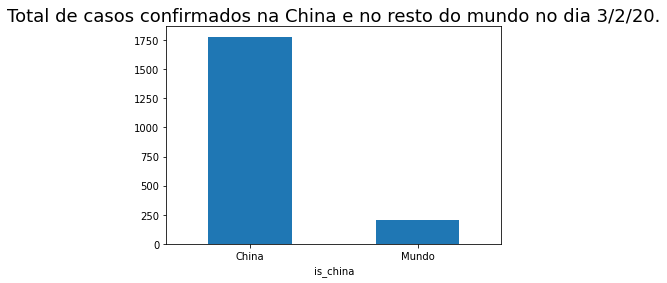

In [208]:
# crescimento do dia 3/1/20 ao dia 3/2/20 na China e no mundo
summed = confirmed.groupby('is_china').sum()
summed['delta'] = summed['3/2/20'] - summed['3/1/20']
summed['delta'].plot(kind = 'bar')
plt.title('Total de casos confirmados na China e no resto do mundo no dia 3/2/20.', fontsize = 18)
plt.xticks([False, True], ['China', 'Mundo'], rotation = 0)
plt.show()

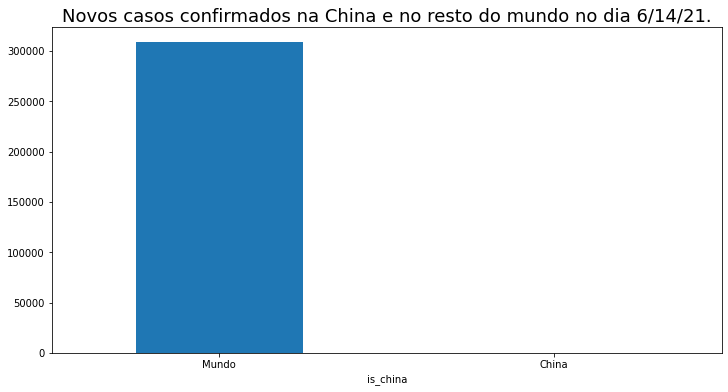

In [209]:
# crescimento do dia 6/13/21 ao dia 6/14/21 na China e no mundo
summed_atual = confirmed.groupby('is_china').sum()
summed_atual['delta_1'] = summed['6/14/21'] - summed['6/13/21']
summed_atual['delta_1'].plot(kind = 'bar', figsize = (12, 6))
plt.title('Novos casos confirmados na China e no resto do mundo no dia 6/14/21.', fontsize = 18)
plt.xticks([False, True], ['Mundo', 'China'], rotation = 0)
plt.show()

In [210]:
# DF summed transposto
summed.T.head()

is_china,False,True
Lat,4517.338850,1085.2923
Long,2429.011414,3688.9377
1/22/20,9.000000,548.0000
1/23/20,12.000000,643.0000
1/24/20,21.000000,920.0000


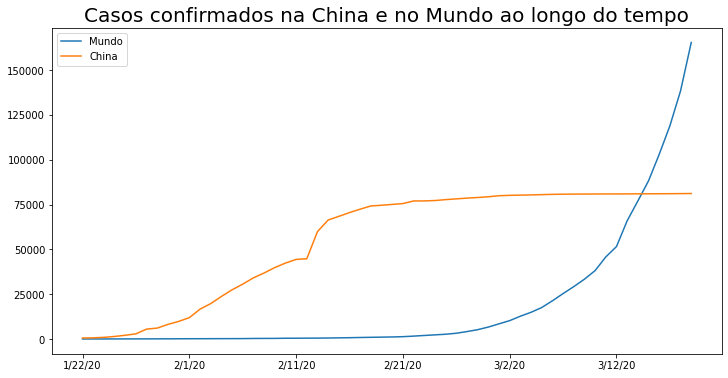

In [211]:
# crescimento no mundo e na china
summed.T[2:60].plot(figsize = (12, 6))   # limitando o gráfico
plt.legend(['Mundo', 'China'])
plt.title('Casos confirmados na China e no Mundo ao longo do tempo', fontsize = 20)
plt.show()

In [212]:
# diferença excluindo [latitude, longitude] : [is_us e delta] 
differences = summed.T[2:60].diff()  # no curso filtra [2:-2]
differences.head()

is_china,False,True
1/22/20,NaN,NaN
1/23/20,3.0,95.0
1/24/20,9.0,277.0
1/25/20,6.0,486.0
1/26/20,16.0,669.0


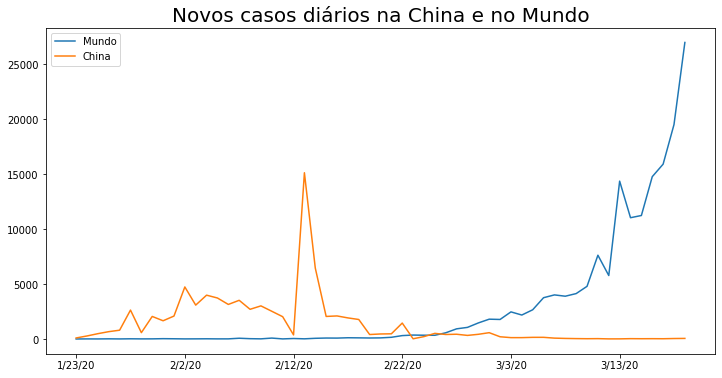

In [213]:
# gráfico dos casos novos
differences.dropna().plot(figsize = (12, 6))  # dropna() para retirar os nulos
plt.title('Novos casos diários na China e no Mundo', fontsize = 20)
plt.legend(['Mundo', 'China'])
plt.show()

In [214]:
# taxa de incidência calculada no dia 3/2/20
# maneira ERRADA de calcular, pois estamos usando toda a população da China
cases = confirmed.groupby('is_china').sum()['3/2/20'].loc[True]
estimated_population = 1437525528
incidence_ratio = cases / estimated_population * 100000   # a cada 100.000 habitantes
incidence_ratio 

5.574579264097771

In [215]:
# lendo arquivo da United NAtions sobre a população mundial em 2019
un_population = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
un_population['PopTotal'] = un_population['PopTotal'] * 1000  # os dados estavam em milhares, colocamos para a quantidade de habitantes
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [216]:
 un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [217]:
# apenas a população total em 2019
un_population_total = un_population.query('Time == 2019')[['Location', 'PopTotal']].set_index('Location')
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [218]:
# un_population.query('Time == 2019 and Location == "Brazil"')

In [219]:
# join nos DataFrames, nesse caso inserimos apenas a coluna PopTotal no combined
combined.join(un_population_total)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Afghanistan,93272,3683,61820,3.948666,5.622643,38041757.0
Albania,132469,2454,129879,1.852509,1.854413,2880913.0
Algeria,134115,3588,93355,2.675316,3.701144,43053054.0
Andorra,13828,127,13626,0.918426,0.923435,77146.0
Angola,36921,842,30775,2.280545,2.663124,31825299.0
...,...,...,...,...,...,...
Vietnam,11304,61,4539,0.539632,1.326087,NaN
West Bank and Gaza,311948,3542,304390,1.135446,1.150254,NaN
Yemen,6864,1350,3775,19.667832,26.341463,29161922.0
Zambia,115824,1444,99895,1.246719,1.424920,17861034.0


In [220]:
# neste caso, conseguimos dar join na China (objetivo do curso)
# porém, no curso antes era 'Mainland China', logo o join foi mal sucedido
combined.join(un_population_total).sort_values('confirmed', ascending = False).loc['China']

confirmed          1.034240e+05
deaths             4.846000e+03
recovered          9.802000e+04
letality_rate_1    4.685566e+00
letality_rate_2    4.710983e+00
PopTotal           1.433784e+09
Name: China, dtype: float64

### Procedimento do Curso, Mainland China != China.

In [221]:
# .str.contains() para identificar todas Locations com China incluso
# un_population.query('Location.str.contains("China") and Time == 2019', engine = 'python')

In [222]:
# .str.contains() para identificar todas Locations com Russia incluso
un_population.query('Location.str.contains("Russia") and Time == 2019', engine = 'python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
205641,643,Russian Federation,2,Medium,2019,2019.5,67602.94,78269.32,145872260.0,8.907


In [223]:
# .str.contains() para identificar todas Locations com Iran incluso
un_population.query('Location.str.contains("Iran") and Time == 2019', engine = 'python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
117713,364,Iran (Islamic Republic of),2,Medium,2019,2019.5,41889.89,41024.003,82913893.0,50.913


In [224]:
# .str.contains() para identificar todas Locations com Us incluso
un_population.query('Location.str.contains("United States") and Time == 2019', engine = 'python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
263406,850,United States Virgin Islands,2,Medium,2019,2019.5,49.704,54.875,104579.0,298.797
264290,840,United States of America,2,Medium,2019,2019.5,162826.299,166238.618,329064917.0,35.974
265174,1111,United States of America (and dependencies),2,Medium,2019,2019.5,164409.733,167972.987,332382720.0,36.295


In [225]:
# assumindo algumas premissas
# estamos assumindo que na UN China = John Hopkins Mainland China

In [226]:
# def rename_location(location):
#   if location == 'China':
#     return 'Mainland China'
#   return location

# un_population_total['location_for_who'] = un_population_total.index.map(rename_location)

# un_population_total.query('location_for_who == "Mainland China"')

In [227]:
# alterando outros nomes
def rename_location(location):
  if location == 'Russian Federation':
    return 'Russia'
  if location == 'Iran (Islamic Republic of)':
    return 'Iran'
  if location == 'United States of America':
    return 'US'
  return location

un_population_total['location_for_who'] = un_population_total.index.map(rename_location)

In [228]:
# inserindo o índice no DT
un_population_total = un_population_total.set_index('location_for_who')

In [229]:
# combined.join(un_population_total.sort_values('confirmed', ascending = False))

### Acima seria o código de alteração de China para Mainland China
### Adicionando uma nova coluna 'location_for_who' e inserindo essa informação

In [230]:
combined_expanded = combined.join(un_population_total).sort_values('confirmed', ascending = False).dropna()
combined_expanded.head(20)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
US,33486038,600285,0,1.792643,100.000000,3.290649e+08
India,29633105,379573,28388100,1.280909,1.319443,1.366418e+09
Brazil,17533221,490696,15519955,2.798664,3.064810,2.110495e+08
France,5806255,110692,400260,1.906427,21.663874,6.512973e+07
Turkey,5342028,48879,5211022,0.914990,0.929276,8.342961e+07
Russia,5176051,125055,4762583,2.416031,2.558598,1.458723e+08
United Kingdom,4596994,128181,15562,2.788366,89.173734,6.753016e+07
Italy,4247032,127101,4014025,2.992702,3.069238,6.055009e+07
Argentina,4172742,86615,3771968,2.075733,2.244736,4.478068e+07
Colombia,3802052,96965,3539442,2.550333,2.666506,5.033944e+07


In [231]:
# criando coluna com taxa de incidência por 100.000 habitantes
# criando coluna com taxa de mortalidade por 100.000 habitantes
# apenas para quantidade de gente testadas e considerando TODA a população
combined_expanded['incidence_ratio'] = (combined_expanded['confirmed'] / combined_expanded['PopTotal']) * 100000
combined_expanded['mortality_rate'] = (combined_expanded['deaths'] / combined_expanded['PopTotal']) * 100000
combined_expanded.head(20)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidence_ratio,mortality_rate
US,33486038,600285,0,1.792643,100.000000,3.290649e+08,10176.119139,182.421452
India,29633105,379573,28388100,1.280909,1.319443,1.366418e+09,2168.670955,27.778693
Brazil,17533221,490696,15519955,2.798664,3.064810,2.110495e+08,8307.633717,232.502781
France,5806255,110692,400260,1.906427,21.663874,6.512973e+07,8914.907080,169.956176
Turkey,5342028,48879,5211022,0.914990,0.929276,8.342961e+07,6403.036275,58.587115
Russia,5176051,125055,4762583,2.416031,2.558598,1.458723e+08,3548.344970,85.729117
United Kingdom,4596994,128181,15562,2.788366,89.173734,6.753016e+07,6807.319769,189.812964
Italy,4247032,127101,4014025,2.992702,3.069238,6.055009e+07,7014.080177,209.910499
Argentina,4172742,86615,3771968,2.075733,2.244736,4.478068e+07,9318.175753,193.420488
Colombia,3802052,96965,3539442,2.550333,2.666506,5.033944e+07,7552.828902,192.622314


In [234]:
recovered.set_index('Country/Region').loc['France']

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
France,French Guiana,3.933900,-53.125800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
France,French Polynesia,-17.679700,149.406800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18617,18617,18617,18617,18617,18617,18617,18650,18650,18650,18656,18658,18661,18661,18677,18677,18677,18677,18677,18700,18700,18705,18707,18707,18711,18711,18714,18717,18721,18721,18721,18728,18736,18736,18736,18749,18749,18749,18749,18771
France,Guadeloupe,16.265000,-61.551000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250
France,Martinique,14.641500,-61.024200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98
France,Mayotte,-12.827500,45.166244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964,2964
France,New Caledonia,-20.904305,165.618042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
France,Reunion,-21.115100,55.536400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19848,19848,19848,19848,21603,21603,21603,21603,21603,21603,21603,21709,21709,21709,21709,21709,21709,21709,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,25088,25088,25088,25088,25088,25088,25088,26333
France,Saint Barthelemy,17.900000,-62.833300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462
France,Saint Pierre and Miquelon,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


In [236]:
# nos EUA de acordo com o Burden Report de influenza 2018/2019, estimativa não final
# de acordo com as HOSPITALIZAÇÕES 
letality_rate_hospitalization = 34157 / 490561 * 100

print(f'Taxa de letalidade por hospitalização nos EUA em 2018-2019: {letality_rate_hospitalization}%')

Taxa de letalidade por hospitalização nos EUA em 2018-2019: 6.962844579980879%


In [239]:
# nos EUA de acordo com o Burden Report de influenza 2018/2019, estimativa não final
# de acordo com as VISTIAS MÉDICAS
letality_rate_medical_visit = 34157 / 16520350 * 100

print(f'Taxa de letalidade por visitas médicas nos EUA em 2018-2019: {letality_rate_medical_visit}%')

Taxa de letalidade por visitas médicas nos EUA em 2018-2019: 0.20675712076317995%


In [240]:
# nos EUA de acordo com o Burden Report de influenza 2018/2019, estimativa não final
# de acordo com os SINTOMÁTICOS
letality_rate_symptomatic = 34157 / 35520883 * 100

print(f'Taxa de letalidade por sintomáticos nos EUA em 2018-2019: {letality_rate_symptomatic}%')

Taxa de letalidade por sintomáticos nos EUA em 2018-2019: 0.09616033475293956%


In [244]:
# coeficientes de incidência nos EUA, Burden Report, incluenza
incidence_ratio_us = 35520883 / 329450000 * 100000
mortality_rate_us = 34157 / 329450000 * 100000

print(f'Coeficiente de INCIDÊNCIA de influenza nos EUA em 2018-2019 por 100.000 habitantes: {incidence_ratio_us}')
print(f'Coeficiente de MORTALIDADE de influenza nos EUA em 2018-2019 por 100.000 habitantes: {mortality_rate_us}')

Coeficiente de INCIDÊNCIA de influenza nos EUA em 2018-2019 por 100.000 habitantes: 10781.873728942177
Coeficiente de MORTALIDADE de influenza nos EUA em 2018-2019 por 100.000 habitantes: 10.367885870390044


In [257]:
confirmed.sum()[3:-2]

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1433
1/26/20         2118
             ...    
6/11/21    175289165
6/12/21    175661047
6/13/21    175963963
6/14/21    176272503
6/15/21    176643833
Length: 511, dtype: object

In [262]:
# criando um Data Frame com os confirmados, recuperados e mortos
grouped_per_day = pd.DataFrame([confirmed.sum()[3:-2], recovered.sum()[3:], deaths.sum()[3:]], index = ['confirmed', 'recovered', 'deaths']).T
grouped_per_day.head()

,confirmed,recovered,deaths
1/22/20,557,30,17
1/23/20,655,32,18
1/24/20,941,39,26
1/25/20,1433,42,42
1/26/20,2118,56,56


In [281]:
# calculando a taxa de letalidade das duas maneiras e inserindo no DF
grouped_per_day['letality_rate_1'] = 100 *grouped_per_day['deaths'] / grouped_per_day['confirmed']
grouped_per_day['letality_rate_2'] = 100 * grouped_per_day['deaths'] / (grouped_per_day['deaths'] + grouped_per_day['recovered'])
grouped_per_day.head()

,confirmed,recovered,deaths,letality_rate_1,letality_rate_2
1/22/20,557,30,17,3.052065,36.170213
1/23/20,655,32,18,2.748092,36.000000
1/24/20,941,39,26,2.763018,40.000000
1/25/20,1433,42,42,2.930914,50.000000
1/26/20,2118,56,56,2.644004,50.000000


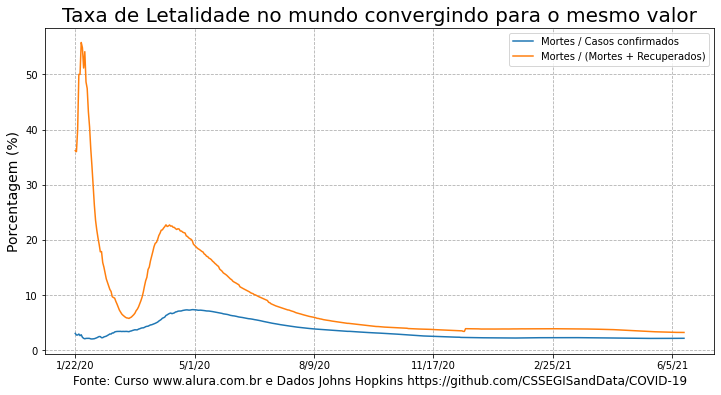

In [297]:
ax1 = grouped_per_day['letality_rate_1'].plot(figsize = (12, 6))
ax2 = grouped_per_day['letality_rate_2'].plot(figsize = (12, 6))
plt.title('Taxa de Letalidade no mundo convergindo para o mesmo valor', fontsize = 20)
ax1.set_xlabel('Fonte: Curso www.alura.com.br e Dados Johns Hopkins https://github.com/CSSEGISandData/COVID-19', fontsize = 12)
ax1.set_ylabel('Porcentagem (%)', fontsize = 14)
plt.legend(['Mortes / Casos confirmados', 'Mortes / (Mortes + Recuperados)'])
plt.grid(linestyle = '--')
plt.show()